In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
iou = pd.read_csv('wandb_dumps/data100/data100-iou-noise2img_vs_img2img.csv')
dist = pd.read_csv('wandb_dumps/data100/data100-dist-noise2img_vs_img2img.csv')
iou.head()

,Step,data100-spiga_ldmk-val_noise2img - val_iou,data100-spiga_ldmk-val_noise2img - val_iou__MIN,data100-spiga_ldmk-val_noise2img - val_iou__MAX,data100-spiga_ldmk-val_img2img - val_iou,data100-spiga_ldmk-val_img2img - val_iou__MIN,data100-spiga_ldmk-val_img2img - val_iou__MAX
0,100,0.205630,0.205630,0.205630,0.501913,0.501913,0.501913
1,200,0.323605,0.323605,0.323605,0.603350,0.603350,0.603350
2,300,0.348569,0.348569,0.348569,0.589234,0.589234,0.589234
3,400,0.431968,0.431968,0.431968,0.597367,0.597367,0.597367
4,500,0.391014,0.391014,0.391014,0.618599,0.618599,0.618599


In [12]:
x_iou = iou['Step']
noise2img_iou = iou['data100-spiga_ldmk-val_noise2img - val_iou']
img2img_iou = iou['data100-spiga_ldmk-val_img2img - val_iou']

x_dist = dist['Step']
noise2img_dist = dist['data100-spiga_ldmk-val_noise2img - val_similarity']
img2img_dist = dist['data100-spiga_ldmk-val_img2img - val_similarity']

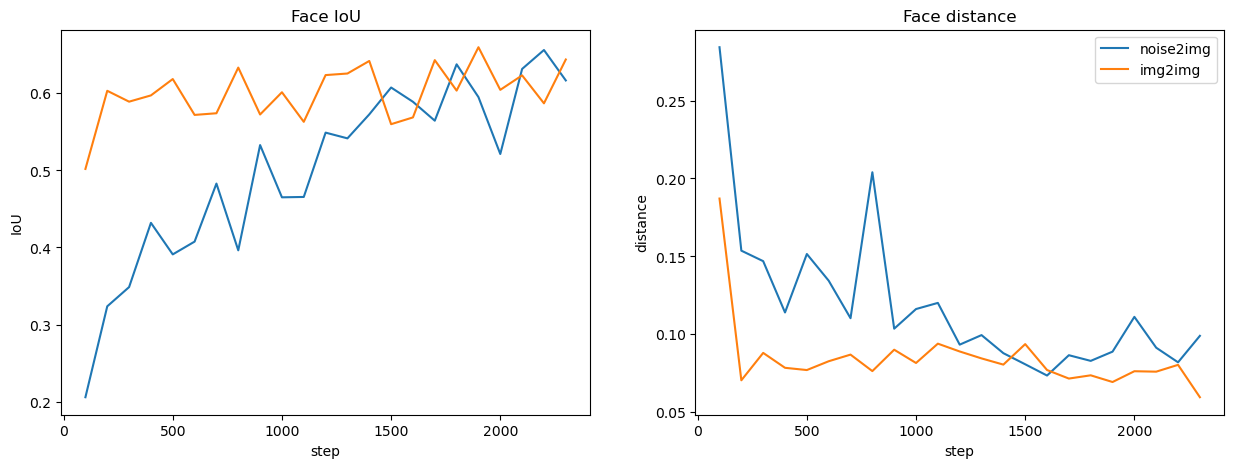

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x_iou, noise2img_iou, label="noise2img")
axs[0].plot(x_iou, img2img_iou, label="img2img")
axs[0].title.set_text("Face IoU")
axs[0].set_xlabel('step')
axs[0].set_ylabel('IoU')

axs[1].plot(x_dist, noise2img_dist, label="noise2img")
axs[1].plot(x_dist, img2img_dist, label="img2img")
axs[1].title.set_text("Face distance")
axs[1].set_xlabel('step')
axs[1].set_ylabel('distance')

plt.legend(loc='upper right')

In [3]:
steps = [5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000]

imgs = [cv2.imread('evaluation_samples/099999.png'), 
        cv2.imread('evaluation_samples/099999_cond.png'),
        cv2.imread('wandb_dumps/full_train/baseline.png')]
for s in steps:
    imgs.append(cv2.imread(f'wandb_dumps/full_train/validation_custom_{s}.png'))
len(imgs)

11

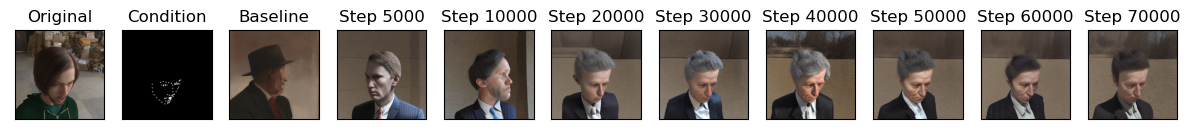

In [5]:
fig, axs = plt.subplots(1, len(imgs), figsize=(15, 5))

for i in range(len(imgs)):
    axs[i].imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    if i == 0:
        title = 'Original'
    elif i == 1:
        title = 'Condition'
    elif i == 2:
        title = 'Baseline'
    else:
        title = f'Step {steps[i-3]}'
    axs[i].title.set_text(title)

In [2]:
iou = pd.read_csv('wandb_dumps/epoch1/val_iou.csv')
dist = pd.read_csv('wandb_dumps/epoch1/val_distance.csv')
clip = pd.read_csv('wandb_dumps/epoch1/val_clip.csv')

iou2 = pd.read_csv('wandb_dumps/epoch1/val_iou_2.csv')
dist2 = pd.read_csv('wandb_dumps/epoch1/val_distance_2.csv')
clip2 = pd.read_csv('wandb_dumps/epoch1/val_clip_2.csv')

iou2.head()

,Step,epoch1-contour-seed420 - val_iou,epoch1-contour-seed420 - val_iou__MIN,epoch1-contour-seed420 - val_iou__MAX,epoch1-contour - val_iou,epoch1-contour - val_iou__MIN,epoch1-contour - val_iou__MAX
0,2000,0.516084,0.516084,0.516084,0.546151,0.546151,0.546151
1,4000,0.550552,0.550552,0.550552,0.554066,0.554066,0.554066
2,6000,0.624389,0.624389,0.624389,0.561131,0.561131,0.561131
3,8000,0.722620,0.722620,0.722620,0.688462,0.688462,0.688462
4,10000,0.739860,0.739860,0.739860,0.734974,0.734974,0.734974


In [3]:
iou_cat = pd.concat(
    [
        iou.rename(columns={'epoch1-seed420 - val_iou': "val_iou"}),
        iou.rename(columns={'epoch1-emergent - val_iou': "val_iou"}),
    ],
    axis=0,
    join="outer",
).reset_index()

dist_cat = pd.concat(
    [
        dist.rename(columns={'epoch1-seed420 - val_distance': "val_dist"}),
        dist.rename(columns={'epoch1-emergent - val_distance': "val_dist"}),
    ],
    axis=0,
    join="outer",
).reset_index()

clip_cat = pd.concat(
    [
        clip.rename(columns={'epoch1-seed420 - val_clip': "val_clip"}),
        clip.rename(columns={'epoch1-emergent - val_clip': "val_clip"}),
    ],
    axis=0,
    join="outer",
).reset_index()

iou2_cat = pd.concat(
    [
        iou2.rename(columns={'epoch1-contour-seed420 - val_iou': "val_iou"}),
        iou2.rename(columns={'epoch1-contour - val_iou': "val_iou"}),
    ],
    axis=0,
    join="outer",
).reset_index()

dist2_cat = pd.concat(
    [
        dist2.rename(columns={'epoch1-contour-seed420 - val_distance': "val_dist"}),
        dist2.rename(columns={'epoch1-contour - val_distance': "val_dist"}),
    ],
    axis=0,
    join="outer",
).reset_index()

clip2_cat = pd.concat(
    [
        clip2.rename(columns={'epoch1-contour-seed420 - val_clip': "val_clip"}),
        clip2.rename(columns={'epoch1-contour - val_clip': "val_clip"}),
    ],
    axis=0,
    join="outer",
).reset_index()
iou_cat

,index,Step,val_iou,epoch1-seed420 - val_iou__MIN,epoch1-seed420 - val_iou__MAX,epoch1-emergent - val_iou,epoch1-emergent - val_iou__MIN,epoch1-emergent - val_iou__MAX,epoch1-seed420 - val_iou
0,0,2000,0.514488,0.514488,0.514488,0.542978,0.542978,0.542978,NaN
1,1,4000,0.549791,0.549791,0.549791,0.551676,0.551676,0.551676,NaN
2,2,6000,0.544046,0.544046,0.544046,0.561206,0.561206,0.561206,NaN
3,3,8000,0.638233,0.638233,0.638233,0.558247,0.558247,0.558247,NaN
4,4,10000,0.736199,0.736199,0.736199,0.577928,0.577928,0.577928,NaN
5,5,12000,0.762717,0.762717,0.762717,0.708584,0.708584,0.708584,NaN
6,6,14000,0.768825,0.768825,0.768825,0.755537,0.755537,0.755537,NaN
7,7,16000,0.773548,0.773548,0.773548,0.761389,0.761389,0.761389,NaN
8,8,18000,0.782749,0.782749,0.782749,0.772455,0.772455,0.772455,NaN
9,9,20000,0.745796,0.745796,0.745796,0.770480,0.770480,0.770480,NaN


In [4]:
sns.set_theme()

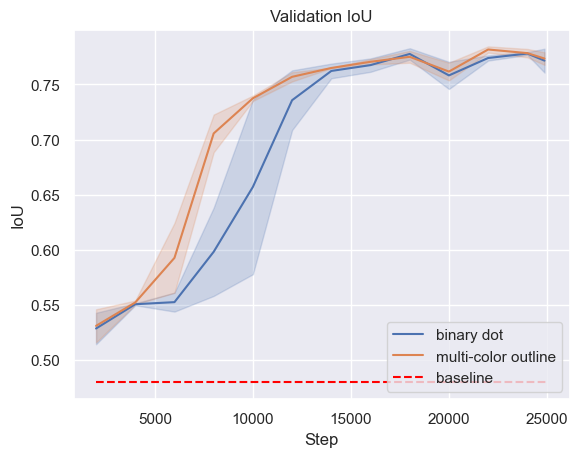

In [25]:
sns.lineplot(data=iou_cat, x='Step', y='val_iou', label='binary dot')
sns.lineplot(data=iou2_cat, x='Step', y='val_iou', label='multi-color outline')
plt.hlines(0.4799, xmin=2000, xmax=25000, linestyle='dashed', color='red', label='baseline')
plt.title('Validation IoU')
plt.ylabel('IoU')
plt.legend(loc='lower right')

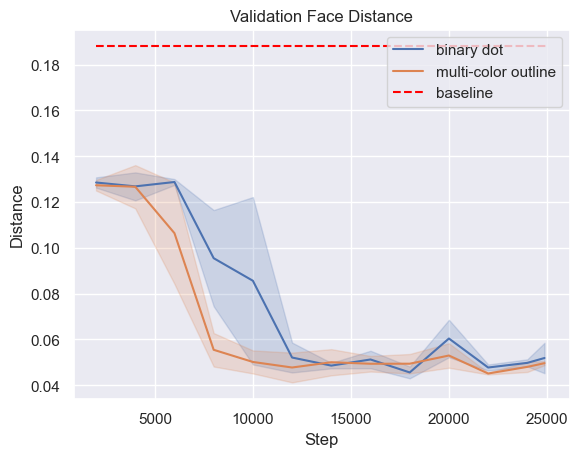

In [28]:
sns.lineplot(data=dist_cat, x='Step', y='val_dist', label='binary dot')
sns.lineplot(data=dist2_cat, x='Step', y='val_dist', label='multi-color outline')
plt.hlines(0.188, xmin=2000, xmax=25000, linestyle='dashed', color='red', label='baseline')
plt.title('Validation Face Distance')
plt.ylabel('Distance')
plt.legend()

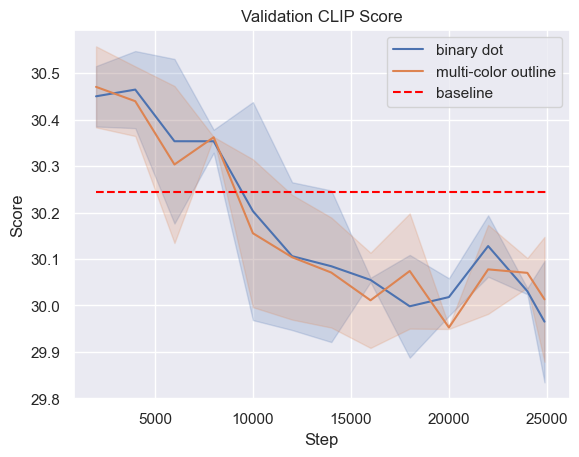

In [5]:
sns.lineplot(data=clip_cat, x='Step', y='val_clip', label='binary dot')
sns.lineplot(data=clip2_cat, x='Step', y='val_clip', label='multi-color outline')
plt.hlines(30.244, xmin=2000, xmax=25000, linestyle='dashed', color='red', label='baseline')
plt.title('Validation CLIP Score')
plt.ylabel('Score')
plt.legend()